In [5]:
import numpy as np
import math
import re
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("Book1.csv")

In [7]:
df=df.sort_values(by="order_amount")

In [8]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Unnamed: 7
0,2,92,925,90,1,cash,3/3/2017 17:38,90
17,4933,92,823,90,1,credit_card,3/24/2017 2:17,90
16,4924,92,965,90,1,credit_card,3/9/2017 5:05,90
15,4761,92,937,90,1,debit,3/20/2017 7:37,90
13,4220,92,747,90,1,credit_card,3/25/2017 20:16,90


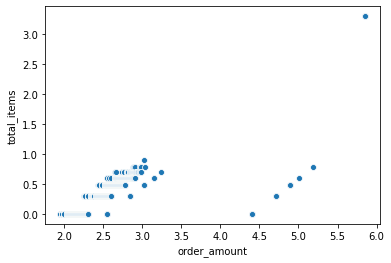

In [18]:
sns.scatterplot(x=np.log10(df.order_amount), y=np.log10(df.total_items), data=df)

As we see from the above graph there are outliers which distort the average order value(AOV). We can do the following\
1. Smooting to get the correct AOV
2. Calculating Median instead of Mean

### Method-1

Removing top 5% values and calculating Mean

In [21]:
df[:int(len(df)*0.95)].order_amount.mean()

284.70568421052633

### Method-2

Calculating median

In [26]:
len(df)

5000

In [30]:
(df["order_amount"].loc[int(len(df)*0.5)]+ df["order_amount"].loc[int(len(df)*0.5)+1])/2

284.0

A better metric would be median and its value is 284

**Question 2:**\
SELECT count(*) FROM [Orders] where ShipperID in (SELECT ShipperID FROM [Shippers] where ShipperName= "Speedy Express");

54

SELECT LastName FROM [Employees] where EmployeeID in (SELECT EmployeeID FROM Orders group by EmployeeID order by count(EmployeeID) desc limit 1);

Peacock

SELECT ProductName FROM [Products] where ProductID = (SELECT ProductID FROM [OrderDetails] where OrderID in (SELECT OrderID FROM [Orders] where CustomerID in (SELECT CustomerID FROM [Customers] where Country ="Germany")) group by ProductID order by count(ProductID) desc limit 1);

Gorgonzola Telino
